# Ejemplo PCA 2D

*Ignacio Díaz Blanco, 2019. Universidad de Oviedo*

### Descripción
Ejemplo detallado, empleando operaciones matriciales básicas (sin utilizar scikit-learn) de descomposición PCA de un conjunto de datos 2D

Text(0.5, 1.0, 'Puntos en el espacio original (2D)')

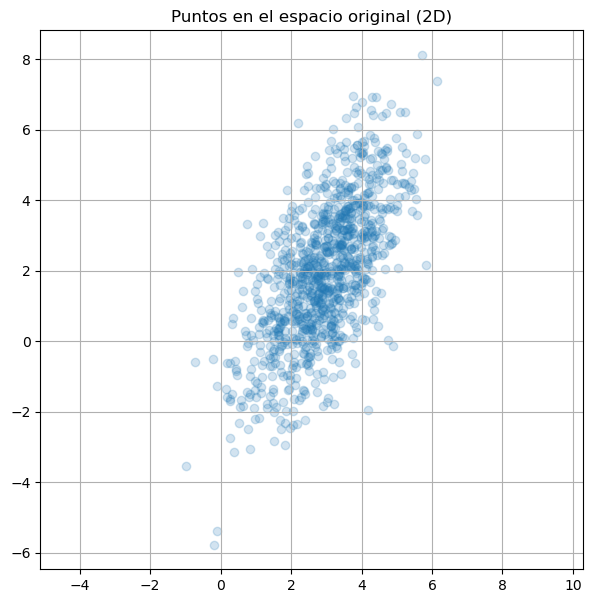

In [1]:
import numpy as np
import numpy.matlib as npmat
import matplotlib.pyplot as plt

%matplotlib inline

# número de muestras
N = 1000;

# conjunto de datos
p = np.dot(np.array([[1,0.5],[0.5,2]]),np.random.randn(2,N)) + npmat.repmat(np.array([[3,2]]).T,1,N);

# plot the sample data set
plt.figure(figsize=(7,7));
plt.clf();
plt.scatter(p[0,:],p[1,:],alpha=0.2)
plt.axis('equal')
plt.grid(True)
plt.title('Puntos en el espacio original (2D)')

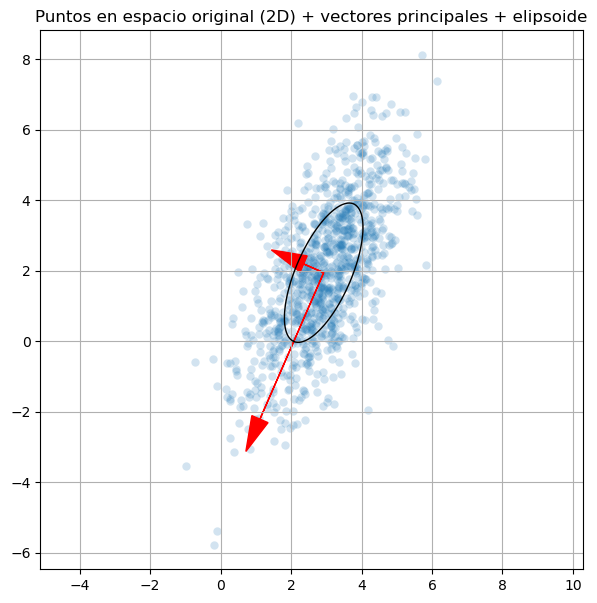

In [2]:

# calcular la media
m = np.mean(p,axis=1);
pm = p - m[:,np.newaxis]

# matriz de covarianzas
C = np.cov(pm)

# obtenemos los valores singulares (también se puede hacer con valores propios)
u,s,v = np.linalg.svd(C)

# plot the sample data set
plt.figure(1,figsize=(7,7));
plt.clf();
plt.scatter(p[0,:],p[1,:],linewidths=0,alpha=0.2)
plt.axis('equal')
plt.grid(True)

# dibujar el elipsoide asociado a la matriz de covarianzas
t = np.linspace(0,2*np.pi,100)
x = (np.cos(t),np.sin(t))
xt = np.dot(np.dot(u,np.sqrt(np.diag(s))),x)
plt.plot(xt[0,:]+m[0],xt[1,:]+m[1],color='k',linewidth=1)
plt.title('Puntos en espacio original (2D) + vectores principales + elipsoide')

# dibujar los vectores propios (direcciones principales)
ax = plt.gca()
ax.arrow(m[0],m[1],u[0,0]*s[0],u[1,0]*s[0],head_width=.5,head_length=1,fc='r',ec='r')
ax.arrow(m[0],m[1],u[0,1]*s[1],u[1,1]*s[1],head_width=.5,head_length=1,fc='r',ec='r')


(-49.95, 1048.95, -5.0, 5.0)

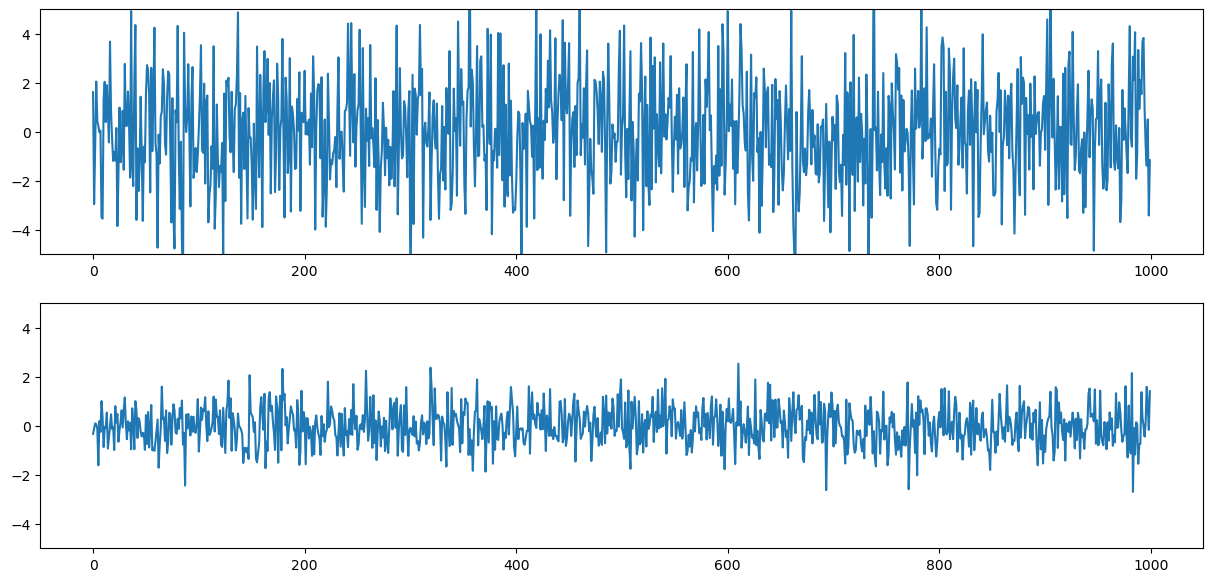

In [3]:
# descomponemos en componentes principales, proyectando pm 
# sobre los vectores unitarios en las direcciones principales
a = np.dot(u.T,pm)

plt.figure(figsize=(15,7))

# primera componente principal
plt.subplot(2,1,1)
plt.plot(a[0,:])
plt.axis(ymin=-5,ymax=5)

# segunda componente principal
plt.subplot(2,1,2)
plt.plot(a[1,:])
plt.axis(ymin=-5,ymax=5)

Text(0.5, 1.0, '% de varianza explicada \n según el número de componentes')

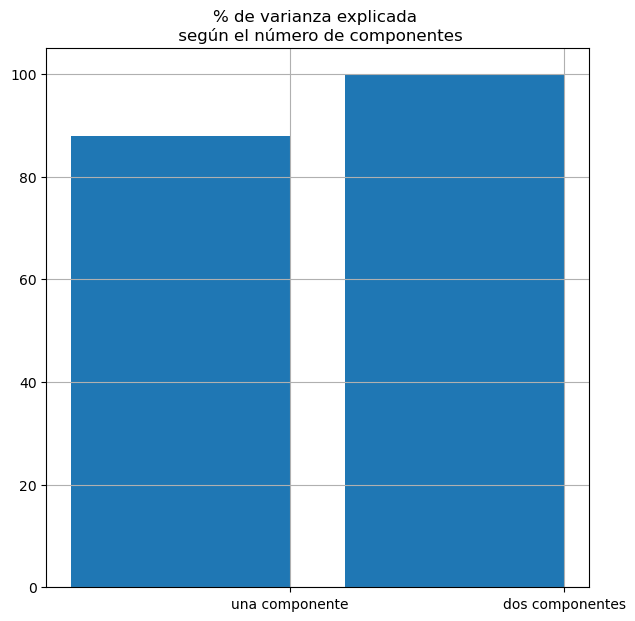

In [4]:
plt.figure(figsize=(7,7))
plt.bar(np.arange(2),100*np.cumsum(s)/sum(s))
ax = plt.gca()

ax.grid(True)

ax.xaxis.set_ticks(np.array([0,1])+0.4)
ax.xaxis.set_ticklabels(['una componente','dos componentes'])
plt.title(u'% de varianza explicada \n según el número de componentes')



Text(0.5, 1.0, 'Proyecciones 1D e histograma')

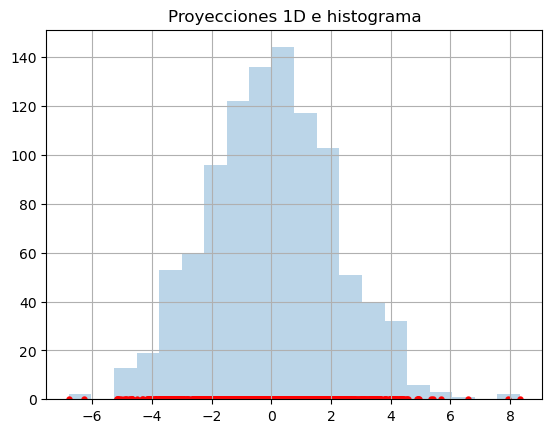

In [5]:
plt.figure(4)
plt.hist(a[0,:],bins=20,alpha=0.3)
plt.scatter(a[0,:],a[0,:]*0,s=20,c='red',linewidths=0.1)
plt.grid(True)
plt.title('Proyecciones 1D e histograma')

# Proyección utilizando scikit-learn
El modelo PCA de la librería scikit-learn simplifica lo anterior, reduciéndolo a dos líneas de código...

In [6]:
from sklearn.decomposition import PCA

# creamos la matriz X con shape (muestras,atributos)
X = p.T

# declaramos modelo PCA
pca = PCA(n_components=2)

# aplicamos modelo PCA para obtener las proyecciones
pr = pca.fit_transform(X)

(-49.95, 1048.95, -5.0, 5.0)

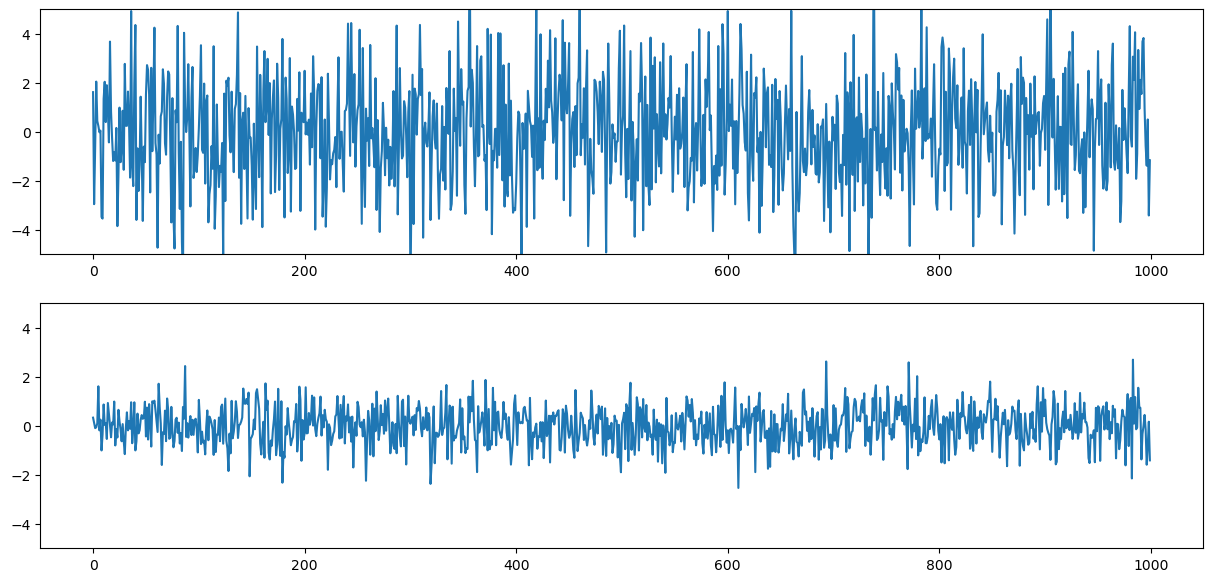

In [7]:
# visualizamos los resultados
plt.figure(figsize=(15,7))
plt.subplot(2,1,1)
plt.plot(pr[:,0])
plt.axis(ymin=-5,ymax=5)
plt.subplot(2,1,2)
plt.plot(pr[:,1])
plt.axis(ymin=-5,ymax=5)

comprobamos algunos de los resultados con ambos métodos y son idénticos, salvo quizás el signo, que depende de la elección arbitraria del sentido de los vectores principales

In [8]:
print(pr[:10,1])
print(a[1,:10])

[ 0.33153713  0.12610605 -0.09518875 -0.06351791  0.10260347  1.61065981
 -0.18632427  0.25004921 -1.00630757 -0.34174078]
[-0.33153713 -0.12610605  0.09518875  0.06351791 -0.10260347 -1.61065981
  0.18632427 -0.25004921  1.00630757  0.34174078]


In [9]:
%%html
<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Licencia de Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">"Ejemplo PCA 2D"</span> by <a xmlns:cc="http://creativecommons.org/ns#" href="http://isa.uniovi.es/~idiaz" property="cc:attributionName" rel="cc:attributionURL">Ignacio Díaz Blanco</a> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Reconocimiento-CompartirIgual 4.0 Internacional License</a>.